<a href="https://colab.research.google.com/github/nayelhashmi2000/DeepLearning/blob/master/3s_and_7s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.5MB/s 
     |████████████████████████████████| 358kB 21.7MB/s 
     |████████████████████████████████| 1.0MB 24.4MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 40kB 4.8MB/s 
     |████████████████████████████████| 40kB 4.6MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 2.6MB 37.1MB/s 
Mounted at /content/gdrive


In [3]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')


In [4]:
path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()


(#3) [Path('valid'),Path('train'),Path('labels.csv')]

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [9]:
im3_path = threes[45]
im3 = Image.open(im3_path)
im3

In [10]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,20,66,142,191,254,254,254,255,205,156,47,0,0,0,0
2,0,0,5,202,246,215,149,122,122,122,122,205,230,244,79,0,0,0
3,0,0,45,218,52,0,0,0,0,0,0,0,27,218,225,19,0,0
4,0,0,7,59,0,0,0,0,0,0,0,0,0,169,221,16,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,27,247,136,0,0,0
6,0,0,0,0,0,0,0,0,0,0,5,47,225,247,17,0,0,0
7,0,0,0,0,0,0,0,0,0,32,128,253,249,84,0,0,0,0
8,0,0,0,0,0,0,0,13,102,223,254,188,64,0,0,0,0,0
9,0,0,0,0,0,0,52,221,249,189,37,4,0,0,0,0,0,0


In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

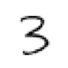

In [12]:
show_image(three_tensors[45]);

In [13]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [14]:
stacked_threes.ndim #rank of the tensor

3

In [15]:
stacked_sevens.ndim

3

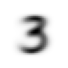

In [16]:
mean3 = stacked_threes.mean(0) #for every pixel, this computes the average of it over all the pictures
show_image(mean3); 

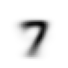

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

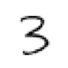

In [18]:
a_3 = stacked_threes[45]
show_image(a_3);

In [19]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr #using L1 and L2 norm

(tensor(0.1117), tensor(0.2032))

In [20]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1511), tensor(0.2866))

In [21]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt() #loss calculation

(tensor(0.1511), tensor(0.2866))

In [22]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [23]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1117)

In [24]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1137, 0.1531, 0.1262,  ..., 0.1180, 0.1109, 0.1125]),
 torch.Size([1010]))

In [27]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)
is_3(a_3), is_3(a_3).float()
is_3(valid_3_tens)

tensor([ True, False,  True,  ...,  True,  True,  True])

In [28]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))